<a href="https://www.kaggle.com/code/pujithavasanth/absenteeism-at-workplace?scriptVersionId=112738403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Business Task
The business environment today is more competitive than it used to be. This leads to increased pressure in the work place. And so, it is reasonable to expect an increase in stress levels of the employees. This can lead to a variety of problems ranging from physical to mental illnesses. But, we will be looking at this problem from the point of view of the person responsible for improving productivity in the company. 

We will explore whether a person presenting certain characteristics is expected to be away from work at some point in time. In other words, we want to know for how many working hours an employee could be away from work, based on information like:

1. How far do they live from the workplace? 
2. Do they have children or pets? 
3. If they do, how many?
4. Do they have a higher education degree?

We'd build a model that predicts an employee's absenteeism i.e. will an employee be absent from work, given certain factors/considerations?

# The Dataset
The Absenteeism-data.csv is a dataset based on an existing study about absenteeism in a work place. It contains information regarding the employee ID, Reason for Absense, Transportation Expense, Distance to Work, Age, Daily Work Load Average, Body Mass Index, Education, Children, Pets, and Absenteeism Time (Hours). 

The relevant libraries are imported, the raw data is loaded using the pandas library, and a copy is made to keep the orignial dataset unharmed. 


In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy 
import sklearn

In [2]:
# Load and view the original dataset 
raw_data = pd.read_csv('../input/employee-absenteeism-prediction/Absenteeism-data.csv')
pd.reset_option('^display.', silent=True) #use in case you used the max_columns method
raw_data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


It's always a good idea to make a copy of the dataset before performing any preprocessing techniques in view of not hampering the original data in case we need to have a look at it during my analysis. We will henceforth be working with the df dataframe.  

In [3]:
# Make a copy of the dataset
df = raw_data.copy()
df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


# Data Preprocessing
A significant amount of time will be devoted to this step as preprocessing is an essential part of any analysis. It involves converting the raw data into a format that is easier for the machine to understand and is useful for further processing and gaining insights. 

What exactly needs to be done in this step? We will go back and first examine the dataset from top to bottom, and from left to right to get a feel of the data. Next, let's check for missing values. This is accomplished with the .info() method. 

In [4]:
# Check for missing values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


We can see that all the columns contain 700 values each. Great! So, there are no missing values in this dataset. What can we do next? Do we need to drop any columns? Are there any columns that are irrelevant to model building? 

## Removing Columns

The ID column gives you the individual identification of an employee. But this is not useful to train a model to predict absenteeism. So, we will remove the column from the dataset. 

In [5]:
# Remove the ID column 
df = df.drop(['ID'], axis = 1)
df

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


Voila! The ID column has been removed from the df dataframe. Next, I'm going to examine the Reason for Absence column which I have shown below. It seems to contain numeric values like 26, 0, 23, 7 etc, which obviously look like codes for the reason why an employee was absent at a given time. 

We shall find out how many reasons there are, and if any reasons (numbers) are missing in the column. We will use the .min(), .max(), .unique(), .len(), and .sorted() functions/methods for these tasks. 

In [6]:
df['Reason for Absence']

0      26
1       0
2      23
3       7
4      23
       ..
695    10
696     6
697    10
698    23
699    28
Name: Reason for Absence, Length: 700, dtype: int64

In [7]:
print(df['Reason for Absence'].min())
print(df['Reason for Absence'].max())
print(df['Reason for Absence'].unique())
print(len(df['Reason for Absence'].unique()))
print(sorted(df['Reason for Absence'].unique()))

0
28
[26  0 23  7 22 19  1 11 14 21 10 13 28 18 25 24  6 27 17  8 12  5  9 15
  4  3  2 16]
28
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]


From the results above, the minimun value is 0, and the maximum value is 28. So there has to be 29 reasons for absenteeism. But, there are only 28 unique values in the column, which means that one of the reasons is missing. To figure out which, we have sorted all the unique the values in the column. So, from the final list, the number 20 is missing. The 20th reason has not been used to be absent from work. 

This column contains only integers. Each integer is substituted for a reason, as shown in this document (Insert link to document). The values here represent categories, and each of the values are equally useful- one is not greater than the other. In mathematics, 2>1, but that clearly does not apply here. This is a list of categorical, nominal data.  

### Adding Dummy Variables
To quantitatively analyze the scenario, we must add meaning to these numbers. One way to go about this is to coonvert these integers into dummy variables. A dummy variable is a binary variable that equals one if a certain categorical effect is present, and 0, if the effect is absent. 

Disclaimer: The study was constructed in such a way that an individual was absent from work due to one and only one reason. 

We will now create a variable called reason_columns to store the dummy variables for the Reason for Absence column, using the get_dummies() method. 



In [8]:
reason_columns = pd.get_dummies(df['Reason for Absence'])
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


We have obtained a dataset containing 28 columns (not 29, because number 20 is missing) with boolean values for all the observations. Let's sum all the values in each row and name the column "Check".

In [9]:
reason_columns['check'] = reason_columns.sum(axis=1)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


If we had obtained any 0s in the new column, that would refer to a missing value. We obtained 1 in all the rows, which proves that a particular employee was absent from work due to only one of the 29 reasons. not more, not less. But how can we know for sure that all 700 observations equaled to 1? We can apply the unique() method to the check column, like this:  

In [10]:
reason_columns['check'].unique()

array([1])

Only one! That's a relief. We can be sure of the validity of the reason columns now. Let's remove the column as we are done analyzing it. 

In [11]:
reason_columns = reason_columns.drop(['check'], axis = 1)

In [12]:
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


To avoid multicollinearity issues, dropping the first column (Reason 0) from this dataframe is essential. 

In [13]:
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True)

In [14]:
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Grouping the Reasons for Absence 
Now we have 27 columns in this dummy variables dataframe. Seems a bit much for analysis. What we can do is group them according to a common characteristic. 

Let's look at the columns in both our dataframes.


In [15]:
print(df.columns.values)
(reason_columns.columns.values)

['Reason for Absence' 'Date' 'Transportation Expense' 'Distance to Work'
 'Age' 'Daily Work Load Average' 'Body Mass Index' 'Education' 'Children'
 'Pets' 'Absenteeism Time in Hours']


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28])

We still have the Reason for Absence column in the df dataframe. This is again a potential cause for multicollinearity due to duplicate information contained in the dataframe that could hamper the model fitting. Let's drop it.  

In [16]:
df = df.drop(['Reason for Absence'], axis=1)
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours'], dtype=object)

Our next step should be to combine the two tables. But right now, adding all the dummy variables to the df dataframe would give us 37 columns in our final dataset! That's not feasible. What could be done?

We could group the dummy variables into classes, based on the Reason Descriptions (link). 

* Reasons 1 to 14 correspond to various diseases- this would be the 1st class. 
* Reasons 15-17 are related to pregnancy- this is our 2nd class. 
* Reasons 18-21 are about poisoning or uncategorized reasons- class 3. 
* Reasons 22-28 represent light reasons - class 4. 

Let's group them accordingly using the loc method. As our final output, for the first class/group, we would need to show a 0 or 1. A 0 would mean that none of the values on the given row would equal to 1. A 1 means that somewhere in the 14 columns, a 1 was observed. Python's max() method can perform this function beautifully. We can do this for all 4 classes:

In [17]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

### Concatinating the two objects
We now muct combine the reason types to the df dataframe. We can use the concat() function to do this.

In [18]:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,23/05/2018,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,24/05/2018,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,0,0,0,1


Look at that! The columns have been added to the right side of the table. I'd like to rename and reorder the columns like this: 

In [19]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']
df.columns = column_names

column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 
                          'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']
df = df[column_names_reordered]
df

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,24/05/2018,235,16,32,237.656,25,3,0,0,2


Perfecto! I'm now going to create a checkpoint here by creating a copy of df. This helps me have more control over my analysis.

In [20]:
df_reason_mod = df.copy()
df_reason_mod

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,24/05/2018,235,16,32,237.656,25,3,0,0,2


Let's now look at the date column. What type is it in? We can use the type function to find out.

In [21]:
type(df_reason_mod['Date'])

pandas.core.series.Series

The entire column is a pandas series object. Well, all the columns in the dataframe are series objects, but what about each element in the column? We couls check the type of the first value in the column like this:

In [22]:
type(df_reason_mod['Date'][0])

str

A string. This makes sense. The data values have been stored as text. We now are going to convert the column containing the str type values into a timestamp type- a standard data type used to represent dates and times. 

In [23]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format = '%d/%m/%Y')
df_reason_mod 


,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2018-05-23,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,2018-05-23,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,2018-05-24,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,2018-05-24,235,16,32,237.656,25,3,0,0,2


In [24]:
df_reason_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Reason_1                   700 non-null    uint8         
 1   Reason_2                   700 non-null    uint8         
 2   Reason_3                   700 non-null    uint8         
 3   Reason_4                   700 non-null    uint8         
 4   Date                       700 non-null    datetime64[ns]
 5   Transportation Expense     700 non-null    int64         
 6   Distance to Work           700 non-null    int64         
 7   Age                        700 non-null    int64         
 8   Daily Work Load Average    700 non-null    float64       
 9   Body Mass Index            700 non-null    int64         
 10  Education                  700 non-null    int64         
 11  Children                   700 non-null    int64         
 12  Pets    

Now the data type for the Date column is datetime64, which means 64-bit datetime values in the column.

### Create a month value column
We will first deduct the month value contained at each date in our dataframe. Let's examine the first value of the date column.

In [25]:
df_reason_mod['Date'][0]

Timestamp('2015-07-07 00:00:00')

This is a timestamp of 7th July, 2015. The time is set to midnight. Since we have not mentioned any time values, Python has automatically assigned zeros to the time values. 

In [26]:
# Extract the month value
df_reason_mod['Date'][0].month

7

We will first create a list filled with all the month values of the dates, and then assign this list as a new column in our dataframe. 

In [27]:
# Create an empty list
list_months = []

# Use a loop to iteratively extract all month values from the date column
for i in range(df_reason_mod.shape[0]):
    list_months.append(df_reason_mod['Date'][i].month)

# Print the list and check the length of the list to see if it coincides with our dataframe
print(list_months)
print(len(list_months))

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

In [28]:
# Assign the list as a column in the dataframe
df_reason_mod['Month Value'] = list_months

#Check the first 15 rows of the dataframe
df_reason_mod.head(15)

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7
5,0,0,0,1,2015-07-10,179,51,38,239.554,31,1,0,0,2,7
6,0,0,0,1,2015-07-17,361,52,28,239.554,27,1,1,4,8,7
7,0,0,0,1,2015-07-24,260,50,36,239.554,23,1,4,0,4,7
8,0,0,1,0,2015-07-06,155,12,34,239.554,25,1,2,0,40,7
9,0,0,0,1,2015-07-13,235,11,37,239.554,29,3,1,1,8,7


Lovely! We can now check whether employees tend to be more absent in specific months of the year compared to other months. In the same way, employees can be absent on certain days of the week more often than other days. So now, we will create a column designating the day of the week. Instead of the names of the days of the week, let's have values like 0 for Monday, 1 for Tuesday, and so on. We will now create a function date_to_weekday

In [29]:
# Define a function that returns the weekdays
def date_to_weekday(date_value):
    return date_value.weekday()

# Create a new column; assign the values from the Date column while implementing the function to each row
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(date_to_weekday)
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


This is perfect. Let's now focus on the Transportation expense, Distance to Work, Age, Daily Work Load Average, and BMI columns. The Transportation Expense column seems to have only integer values, and not floats. Obviously, the values were rounded up or down. This does not matter as a few cents is not going to make a huge impact in us determining the reason for absenteeism. 

Next, the Distance to Work column. It contains integer values which represent the kilometers a person must travel to reach work each day. Of course, the time spent travelling everyday would affect absenteeism at a workplace. So, we keep this column.

Age Column. Well, how old a person is could have an effect on his/her/their behaviour. We are keeping this column as well. 

Daily Work Load Average column. It is a float value that shows the average nmber of time spent working per day, represented in minutes. An average employee works about 4 hours a day in this company. 

Next, The BMI column. Normally, people who have a higher BMI often have an additional reason for being absent from work. Hence, we keep this column as well.

#### The Next Three Columns
There is something in common in the Education, Children, and Pets columns. All three of them represent categorical data! The Pets and Children columns represent the number of pets or children each emploee has. But the numbers in the Education column has no meaning. So let's transform this column into a column comprising of dummy variables using the map() function. But, a few steps before this:

In [30]:
# Implement the unique method to Education 
display(df_reason_mod['Education'].unique())

# Count the number of employees in each type of education
display(df_reason_mod['Education'].value_counts())


array([1, 3, 2, 4])

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

So there are 4 unique values. They represent:
1 - Only High School Education
2 - Graduate
3 - Postgraduate
4 - Masters/ Dcotrate

There are 583 high school pass-outs, 73 graduates, 40 postgraduates, and 4 masters/ PhDs. 

Now we can map the dummy variables to the column- 1 for graduates, postgrads, and Masters/PhDs, and 0 for high school pass-outs.

In [31]:
df_reason_mod['Education'] = df_reason_mod['Education'].map({1:0, 2:1, 3:1, 4:1})

# Check unique values 
display(df_reason_mod['Education'].unique())

# Count the values in each category
df_reason_mod['Education'].value_counts()

array([0, 1])

0    583
1    117
Name: Education, dtype: int64

Now, the values in the Education column have two unique values: 0 and 1. The dataframe looks good! The preprocessing part is done. We can create a check point. 

In [32]:
df_preprocessed = df_reason_mod.copy()
df_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3


# Creating Targets
We will be using Logistic Regression to classify people into two classes- Absent and Not Absent. How do we identify who falls under which category? We'll just find a way to figure out if someone has been absent "too much". Let's take the median of the absenteeism time. All the values below the median will be considered normal, and hence Not Absent. All the values above the median would be considered Absent.

In [33]:
df_preprocessed['Absenteeism Time in Hours'].median()

3.0

The value is a float 3. So it is safe to say that everyone who has been absent for more than three hours is considered excessively absent. Values less than three will be assigned to 0 and values greater than three will be assigned to 1. We will create a new variable called targets for this step.

In [34]:
targets = np.where(df_preprocessed['Absenteeism Time in Hours'] > df_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [35]:
# Add the targets array to the dataframe
df_preprocessed['Excessive Absenteeism'] = targets
df_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week,Excessive Absenteeism
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1,0
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2,0
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3,1
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3,0


Lovely! We can now go ahead and drop columns that we do not require henceforth. 

In [36]:
df_with_targets = df_preprocessed.drop(['Absenteeism Time in Hours', 'Date','Day of the Week', 'Daily Work Load Average', 'Distance to Work'], axis=1)
df_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Month Value,Excessive Absenteeism
0,0,0,0,1,289,33,30,0,2,1,7,1
1,0,0,0,0,118,50,31,0,1,0,7,0
2,0,0,0,1,179,38,31,0,0,0,7,0
3,1,0,0,0,279,39,24,0,2,0,7,1
4,0,0,0,1,289,33,30,0,2,1,7,0


# Feature Selection

In [37]:
# Check the shape of the dataframe
df_with_targets.shape

(700, 12)

In [38]:
# Create a variable that contains all the features (all columns except the last one)
unscaled_features = df_with_targets.iloc[:,:-1]
unscaled_features.shape

(700, 11)

# Standardization
Standardization is an important preprocessing tool. Data of different magnitudes can be biased towards high values. Standardizing them will bring all the features to the same magnitude. StandardScaler is a useful module that is frequently used for standardization. 

In [39]:
from sklearn.preprocessing import StandardScaler

# Declare a scaler object that will contain the scaling information
scaler = StandardScaler()

In [40]:
# Fit the data by finding the internal parametrs of a model that will be used to transform the data
scaler.fit(unscaled_features)

# Standardize the data using the transform method; apply the parameters found while fitting the data
scaled_features = scaler.transform(unscaled_features)
print(scaled_features)
scaled_features.shape

[[-0.57735027 -0.09298136 -0.31448545 ...  0.88046927  0.26848661
   0.18272635]
 [-0.57735027 -0.09298136 -0.31448545 ... -0.01928035 -0.58968976
   0.18272635]
 [-0.57735027 -0.09298136 -0.31448545 ... -0.91902997 -0.58968976
   0.18272635]
 ...
 [ 1.73205081 -0.09298136 -0.31448545 ... -0.91902997 -0.58968976
  -0.3882935 ]
 [-0.57735027 -0.09298136 -0.31448545 ... -0.91902997 -0.58968976
  -0.3882935 ]
 [-0.57735027 -0.09298136 -0.31448545 ... -0.01928035  0.26848661
  -0.3882935 ]]


(700, 11)

We see that all the features have been standardized.

# Splitting the Data into Train and Test

In [41]:
from sklearn.model_selection import train_test_split

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(scaled_features, targets, test_size=0.3, random_state=0)

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Create a Logistic Regression object
reg = LogisticRegression()

# Fit the training features 
model = reg.fit(X_train, y_train)

Now that we have trained the model using the training data, we can use the test data to evaluate how well it predicts. 

In [43]:
predictions = model.predict(X_test)
print('Predicted Labels', predictions)
print('Actual Labels', y_test)

Predicted Labels [0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0
 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0
 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0
 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1]
Actual Labels [0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0
 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1
 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0
 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1]


Hmm. Looks like there are too many of them to make sense of the predictions. We can utilize some of sklearn's metrics to evaluate the predictions.

# Metrics Evaluation

In [44]:
# Import relevant libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

print('Accuracy Score: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions))
print('Classification Report:')
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


Accuracy Score:  0.7666666666666667
Precision:  0.7684210526315789
Recall:  0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       110
           1       0.77      0.73      0.75       100

    accuracy                           0.77       210
   macro avg       0.77      0.77      0.77       210
weighted avg       0.77      0.77      0.77       210

[[88 22]
 [27 73]]


Our accuracy is about 76%, which is not bad at all. Because this is a binary classification problem, the 1 class is considered positive. Let us look at it's precision and recall. 

The precision for 1 class is around 76%, which means that of the employees the model predicted to be absent,how many were actually absent? 

The recall score for 1 class is 73%, and this answers the question- Of all the employees that were actually absent, how many did the model identify?

The diagonal line in the confusion matrix has the values 88 and 73, which correspond to True Negatives, and True Positives, respectively. These figures are significantly higher than the rest of the matrix (false predictions). Hence, the model is good. 

# Predicted Probabilities
Logistic Regression is based on probability. What gets predicted by a binary classifier is actually the probability that the label is true P(y), and the probability that the label is false 1-P(y). A threshold value of 0.5 is used to determine whether the predicted label is 1 or 0. The predict_proba method calculates the probabilites of each class.

In [45]:
probabilities = model.predict_proba(X_test)
probabilities

array([[0.86467346, 0.13532654],
       [0.87164665, 0.12835335],
       [0.78065036, 0.21934964],
       [0.59842363, 0.40157637],
       [0.78998014, 0.21001986],
       [0.93937858, 0.06062142],
       [0.12962003, 0.87037997],
       [0.30269771, 0.69730229],
       [0.03834148, 0.96165852],
       [0.28688261, 0.71311739],
       [0.15869073, 0.84130927],
       [0.32797157, 0.67202843],
       [0.47950499, 0.52049501],
       [0.9812338 , 0.0187662 ],
       [0.23027503, 0.76972497],
       [0.13367385, 0.86632615],
       [0.14973481, 0.85026519],
       [0.02575193, 0.97424807],
       [0.15793234, 0.84206766],
       [0.78065228, 0.21934772],
       [0.870436  , 0.129564  ],
       [0.28688261, 0.71311739],
       [0.74795284, 0.25204716],
       [0.62406099, 0.37593901],
       [0.09809581, 0.90190419],
       [0.25826779, 0.74173221],
       [0.77587796, 0.22412204],
       [0.870436  , 0.129564  ],
       [0.62406099, 0.37593901],
       [0.98741187, 0.01258813],
       [0.

A common way to evaluate a classifier is to examine the True Positive Rate (Recall) and the False Positive Rate for a range of possible thresholds. These rates are plotted against all possible thresholds to form the ROC chart. (Received Operator Characteristic)

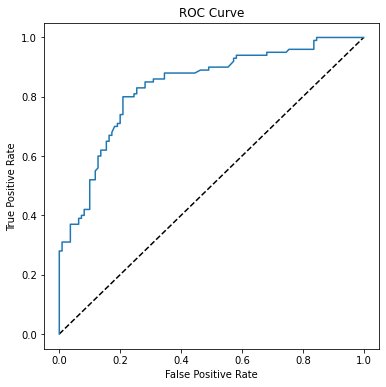

In [46]:
%matplotlib inline

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

# Plot ROC chart
fig = plt.figure(figsize = (6, 6))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

This chart shows the curve of the true and false positive rate for different threshold values between 0 and 1. The diagonal line represents the probability of predicting correctly with a 50:50 random prediction. So, a good model will have a curve above the diagonal, like the one we made. 

The Area Under the Curve (AUC) is a value between 0 and 1 that quantifies the overall performance of our model. The closer the value is to 1, the better the model. Let's see what we get.

In [47]:
auc = roc_auc_score(y_test, probabilities[:,1])
print('AUC', str(auc))

AUC 0.8343636363636363


We have a 0.8, which is a great score. Our model has performed much better than a random guess. We can move on to the final task, which is saving the model/ pickling the model. 

# Saving the Model

In [48]:
import pickle
with open('model', 'wb') as file:
    pickle.dump(reg, file)

with open('scaler', 'wb') as file:
    pickle.dump(scaler, file)


# Loading the Model for Testing

In [49]:
# Loading the Model for Testing
model1 = pickle.load(open('model', 'rb'))

# Get a dataframe that compares actual and predicted labels
prediction = reg.predict(X_test)
predicted_values = pd.DataFrame({'Actual':y_test, 'Predicted':prediction})
predicted_values

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
205,1,1
206,0,0
207,1,1
208,1,0


We will now create a new array that contains the observations of a new employee, and use the model to predict whether the employee will be excessively absent or not. 

# Testing the Model with New Data

In [50]:
# Create an array containing information about a new employee
new_data = np.array([[0, 0, 1, 1,150,40,29,1,0,2,2]])

# Use the model to predict the absenteeism
model_prediction = np.array(reg.predict(new_data))
model_prediction

array([1])

The output is a 1, which means that the employee is likely to be excessively absent during working hours. A new row of observations can be used to predict absenteeism in this manner. 

We have sucessfully reached the end of our analysis. To recap, we preprocessed the absenteeism dataset and used a Logistic Regression model to predict whether an employee is excessively absent from work, based on relevant features. 

# End